###  Airline Passenger Survey Analysis using KNN and XGBoost models 


This notebook will analyze an airline survey data set from the 
<a href="https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction"> Kaggle </a> database. Our goal is to use machine learning models that can learn from the survey tables so that we can predict whether a new airline customer is going to be satisfied or unsatisfied with the service. For this part of the project, we will use standard machine learning models and compare results with the ones obtained using the Amazon SageMaker machine learning service.

### Describing data

The survey dataset has already been separated into two tables: the train and the test, with the ratio, 80% for the train data, and 20% for the test data. The train table has 103905 rows and 24 columns, while the test table has 25977 rows. The table columns contain various types of information, both in categorical and non-categorical forms. In general, all data can be organized into two main groups: information related to the passengers and those associated with airline flights. 

Train and test table columns holding passengers information are:
<ul>
<li><i> passenger id:</i> numerical value, not needed for the modeling and prediction</li>
<li><i>passenger gender:</i> categorical type with two possible values, male and female </li>      
<li> <i>customer type:</i> categorical type with two values loyal and disloyal customer </li>
<li> <i>passenger age:</i> continues integer number between 10 and 80 </li>
<li> <i>type of travel:</i> categorical type with two possible values business travel or personal travel </li>
<li> <i>traveling class:</i> categorical variable with three values economy,  economy plus and  business </li>
<li> <i>passenger satisfaction:</i> categorical variable with two possible values "satisfied" or "dissatisfied"</li>
</ul>

The rest of the columns are general information about the flight and passenger's survey data on flight services: 
<ul>
<li> <i>flight distance:</i> numerical values possible in units of miles</li>
<li> <i>inflight wifi service:</i> represented as numbers between 0 and 5 </li>
<li> <i>departure/arrival time convenient:</i> numerical values  between 0 and 5 with 0 meaning not convenient time and 5 meaning the most convenient time</li>
<li> <i>ease of online booking:</i> numerical values between 0 and 5 with 0 
meaning not easy booking and five meaning very easy booking </li>
<li> <i>departure delay in minutes:</i>  numerical values</li>
<li> <i>arrival delay in minutes:</i> numerical values </li>    
other columns having numerical values between 0 and 5 are: 
<li> gate location, food and drink, online boarding,seat comfort,inflight entertainment,onboard service, legroom service, baggage handling, check-in service,inflight service and cleanliness </li>     
</ul>

The above list of columns reveals that the <b> label variable</b>, or variable that we are predicting, is stored in column <b>passenger satisfaction</b>. The <b> feature variables </b>, or attributes we use for predictions, can be chosen from the other 23 columns. 

### Describing the problem and machine learning models used

For the given dataset,  we are trying to predict two possible options, whether a customer is going to be satisfied or dissatisfied with the airline service. Therefore we can consider the project, a binary classification problem. Because we have a survey containing a set of answers to this question, this is also a supervised learning problem.  

There are many algorithms that can use input data to learn and classify new observations into two or more groups. However, for the given dataset, we will use two popular classification models: KNN- K nearest neighbor algorithm and XGBoost - X gradient boosting model. Both models are also supported by the Amazon SageMaker machine learning services.

The <b> K-NN model</b> takes into account k nearest number of neighbors around the point we want to predict. Out of various neighboring classes, the more frequent ones will be assigned to the point. Although we are applying this model to only two classes, in general, the method can be used for datasets with any number of groups.  The main parameters that we need to choose are k - number of neighbors and how the distance is measured between data points. K can be any positive number, but usually, its value is between 3 and 6. Having k=1 leads to a model that is too complex and gives low accuracy. Similarly, a model with k=10 is too simple and also leads to low performance. In principle,  we need to find the most optimal values for the parameter k. The main advantage of the K-NN model is that it is easy to apply on a dataset, as a first machine learning model and provides acceptable performance without much tuning. On the other hand, the model can be slow with large datasets and when used with many features.     

The second model, <b> XGBoost </b>,  is based on combinations of boosting methods and gradient descent. All types of machine learning boosting methods belong to the ensemble family of algorithms, which add models iteratively to correct the previous model and create a strong one. Through this process, the errors of the previous models are corrected by the next predictor using different weights until the training data is accurately predicted or reproduced by the model. In the case of the gradient boosting errors are calculated using gradient descent, or minimum residuals of the model. The main advantage of the model is that <a href="https://xgboost.readthedocs.io/en/latest/#"> XGBoost </a>, provides an efficient ML algorithm created for the performance and the computational speed with additional features for the model tuning, computing environments, and algorithm enhancement. As a type of gradient boosting method, it tends to overfit data and requires larger memory and computational time when applied on large datasets. 


### Exploratory data analysis and feature engineering

Exploratory data analysis includes many different methods for discovering the properties of the variables and relationships between them. The term feature engineering is related to input data preparations for use by the machine learning algorithms and also for improving the performance of the model. 

Some of the steps of data preparations we used include: dealing with missing values, examining categorical and numerical columns, exploring the relationship between different features, and preparing variables for use by the machine learning models. 

We also organised tables into formats as expected by SageMaker. SageMaker requires a label variable to be in the first column of the table and that the training and test tables do not have headers. 

#### Importing tables and selecting columns

In [1]:
#importing Python libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set(style="whitegrid")

In [2]:
#importing training dataset
file ='../data/train.csv'

#creating a data frame with 24 columns plus the label column as an index column
df_train= pd.read_csv(file, index_col='satisfaction')                          

In [3]:
display(df_train.head(5))

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,5,4,3,4,4,5,5,25,18.0
neutral or dissatisfied,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,1,5,3,1,4,1,1,6.0
satisfied,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,5,4,3,4,4,4,5,0,0.0
neutral or dissatisfied,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,2,5,3,1,4,2,11,9.0
satisfied,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [4]:
#dropping the first two columns being not necessary for analysis
df_train.drop(['Unnamed: 0', 'id'], inplace=True, axis=1)

In [5]:
#displaying information about table
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, neutral or dissatisfied to neutral or dissatisfied
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Onlin

None

***
From the table info, we can notice that all columns contain values and that there are no missing values, except for the "Arrival Delay in Minutes" column. There are 310 missing values in this column, covering only 0.3% of the entire data set, hereafter we can drop the rows with missing data.  After completing this process, we will have a training table with 103594 rows.   

In [6]:
#finding missing values and dropping rows
display(df_train['Arrival Delay in Minutes'].isnull().sum())
df_train.dropna(inplace=True)

display(df_train.info())

310

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, neutral or dissatisfied to neutral or dissatisfied
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Onlin

None

In [7]:
#exploring the testing table for the missing values
file ='../data/test.csv'
df_test= pd.read_csv(file, index_col='satisfaction') 

#dropping two columns
df_test.drop(['Unnamed: 0', 'id'], inplace=True, axis=1)

#dropping missing rows
display(df_test['Arrival Delay in Minutes'].isnull().sum())
df_test.dropna(inplace=True)
display(df_test.info())

83

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, satisfied to neutral or dissatisfied
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  object 
 1   Customer Type                      25893 non-null  object 
 2   Age                                25893 non-null  int64  
 3   Type of Travel                     25893 non-null  object 
 4   Class                              25893 non-null  object 
 5   Flight Distance                    25893 non-null  int64  
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online boarding                  

None

#### Checking the balance in datasets

We need to explore the class imbalance problem, which can introduce bias and errors in the predictions. In our case, we will check if the number of satisfied customers in the train and test tables is similar to the number of unsatisfied customers. The imbalance problem in data samples is especially important when performing classification. If one class is significantly lower than another, machine learning algorithms will produce inaccurate predictions, as most algorithms do not take into account class distribution. In that situation, resampling variables,  or using some of the boosting based techniques is needed. 

57% 56%


Text(0, 0.5, 'count')

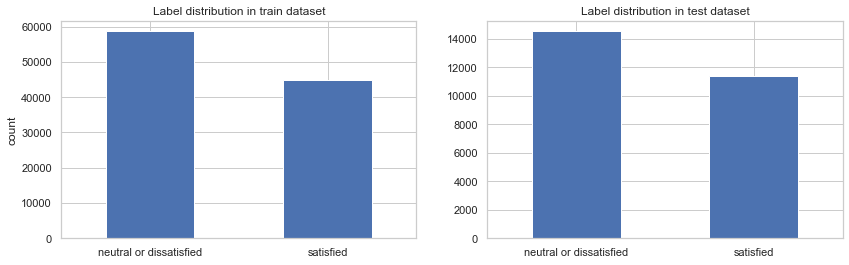

In [8]:
#finding the number of satisfied and unsatisfied customers in the tables
count_train=df_train.index.value_counts()
count_test=df_test.index.value_counts()

#percentage of satisfied customers in each table
print("{0:.0f}%".format(count_train[0]/(count_train.sum()) * 100), 
      "{0:.0f}%".format(count_test[0]/(count_test.sum()) * 100))

#plotting bar graphs
fig, ax = plt.subplots(figsize = (14, 4), ncols = 2)
ax1=count_train.plot.bar(ax=ax[0], rot=0)
ax2=count_test.plot.bar(ax=ax[1], rot=0)
ax1.set_title('Label distribution in train dataset')
ax2.set_title('Label distribution in test dataset')
ax1.set_ylabel('count')

***
The airline datasets are distributed evenly for two classes of the target column. 

#### Exploring categorical and ordinal variables

The table has five categorical columns: <i>Gender</i>,  <i>Customer Type</i>, <i>Type of Travel</i>,  <i>Class</i>, and <i>satisfaction</i>, with two or three possible options, and 12 ordinal columns with values between zero and five. The difference between categorical and ordinal variables is that ordinal variables have clear ordering from low (zero) to high (five) quantities, while categorical variables display only different values, for example, type of travel can be Business or Personal travel. 

In [9]:
#frequency counts for the categorical type columns 
categorical_cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']

for col in categorical_cols:
    display(df_train[col].value_counts())   

Female    52576
Male      51018
Name: Gender, dtype: int64

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64

Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64

Text(0.5, 1.0, 'Distribution of Travel type')

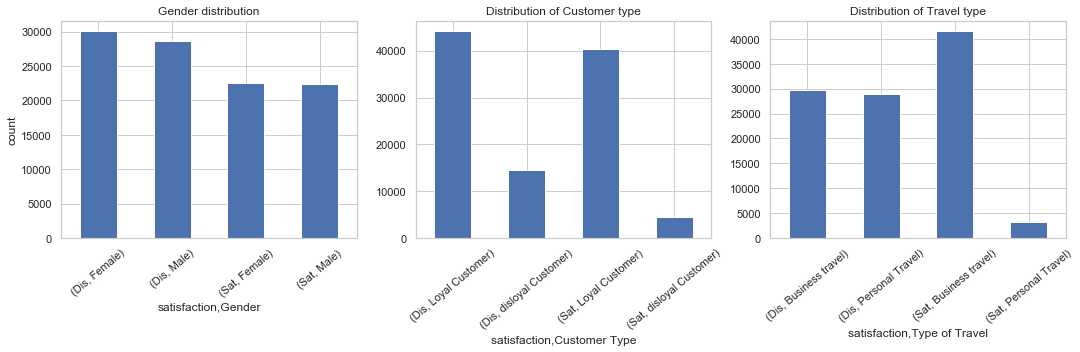

In [10]:
#example of bar graphs for three categorical columns
columns=['Gender', 'Customer Type', 'Type of Travel']
df1=df_train.rename(index={'neutral or dissatisfied': 'Dis', 'satisfied': 'Sat'})

fig, ax = plt.subplots(figsize = (18, 4), ncols = 3)

gen=df1.groupby([df1.index, 'Gender']).size()
ax1=gen.plot.bar(ax=ax[0], rot=40)

cs=df1.groupby([df1.index, 'Customer Type']).size()
ax2=cs.plot.bar(ax=ax[1], rot=40)

tt=df1.groupby([df1.index, 'Type of Travel']).size()
ax3=tt.plot.bar(ax=ax[2], rot=40)
ax1.set_ylabel('count')
ax1.set_title('Gender distribution')
ax2.set_title('Distribution of Customer type')
ax3.set_title('Distribution of Travel type')

***
The bar graphs above show that there are more dissatisfied customers than those who are happy with the service. Loyal customers tend to be more satisfied with the service when compared with disloyal customers. There is a significantly larger number of satisfied customers who travel because of business reasons than those who travel because of personal reasons. 

Text(0.5, 1.0, 'Inflight service distribution')

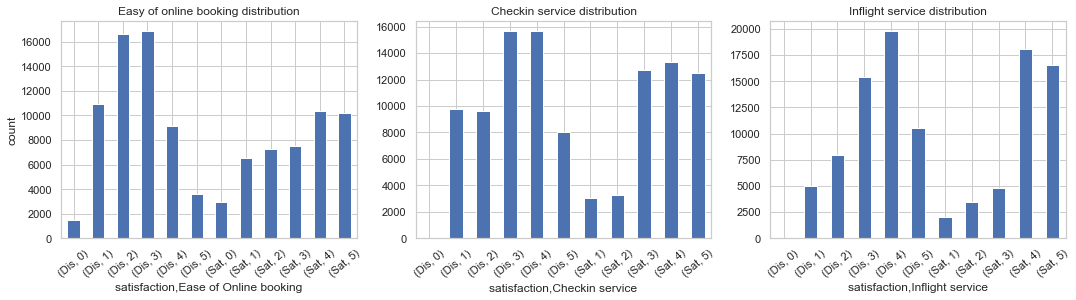

In [11]:
#example of bar graphs for some ordinal columns
columns=['Ease of Online booking', 'Checkin service', 'Inflight service']

fig, ax = plt.subplots(figsize = (18, 4), ncols = 3)

on=df1.groupby([df1.index, 'Ease of Online booking']).size()
ax1=on.plot.bar(ax=ax[0], rot=40)

cs=df1.groupby([df1.index, 'Checkin service']).size()
ax2=cs.plot.bar(ax=ax[1], rot=40)

ins=df1.groupby([df1.index, 'Inflight service']).size()
ax3=ins.plot.bar(ax=ax[2], rot=40)

ax1.set_ylabel('count')
ax1.set_title('Easy of online booking distribution')
ax2.set_title('Checkin service distribution')
ax3.set_title('Inflight service distribution')

***
The bar plots of three ordinal columns show that the highest levels of dissatisfaction are in the middle of the number range (around numbers 2 to 4) and that this level is higher than the level of satisfaction for the same columns. Overall more people are dissatisfied with both check-in and inflight services than those who are satisfied. 

Similarly, the bar graphs for other variables can provide an important insight into the data.

#### Exploring numerical columns

The four numerical columns <i>Age</i>, <i>Flight Distance</i>, <i>Departure Delay in Minutes</i>, and <i>Arrival Delay in Minutes</i> have continuous numerical values. We will examine whether these columns contain any negative numbers and explore whether there is a correlation between them. We can also check their distribution using histograms and box plots.

In [12]:
#checking for negative values
num_columns=['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']

for col in num_columns:
    p=(df_train[col]<0).all().sum()
    if p == 0:
        print(col, '- no negative values')
    else:
        print(col, "- has negative values")

Age - no negative values
Flight Distance - no negative values
Departure Delay in Minutes - no negative values
Arrival Delay in Minutes - no negative values


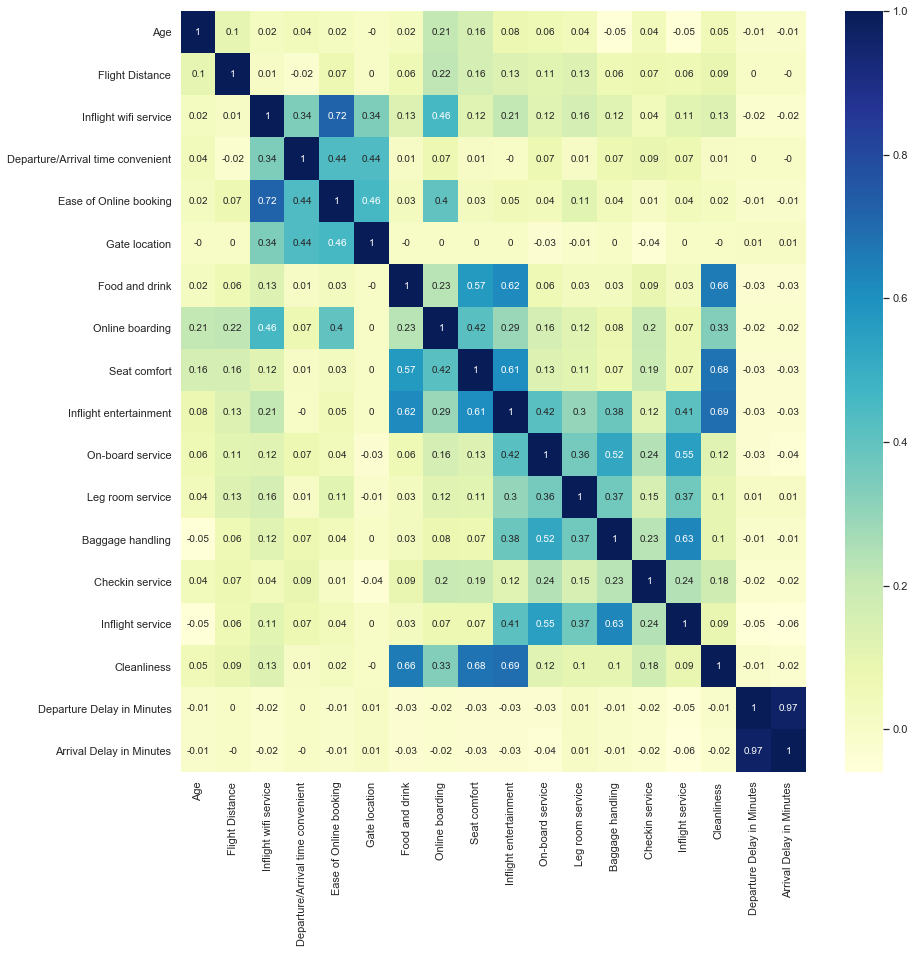

In [13]:
#preparing df for the correlation matrix
df_corr=df_train.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class'], axis=1)
df_corr.reset_index(drop=True, inplace=True)

#calculating the correlation matrix
corr = df_corr.corr().round(2)

#plotting correlation coefficients
ax = plt.subplots(figsize = (14, 14))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

***
From the above correlation matrix, we can see that two columns: <i>Departure Delay in Minutes</i> and <i>Arrival Delay in Minutes</i> are strongly correlated, therefore we can remove one of them. 

#### Distribution of the numerical features

Text(0.5, 1.0, 'Flight distance distribution')

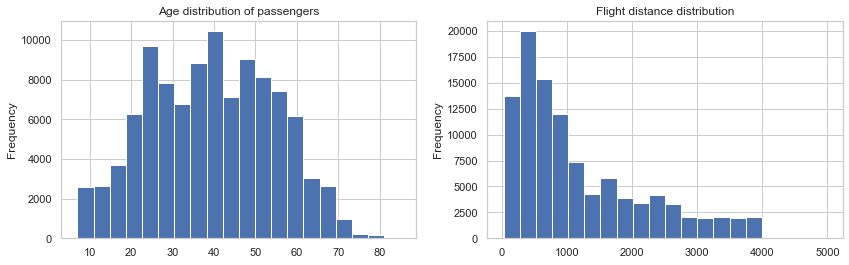

In [14]:
#histograms of the age and flight distance
fig, ax = plt.subplots(figsize = (14, 4), ncols = 2)

ax1= df_train['Age'].plot(kind='hist', bins=20, ax=ax[0])
ax2=df_train['Flight Distance'].plot(kind='hist', bins=20, ax=ax[1])
ax1.set_title('Age distribution of passengers')
ax2.set_title('Flight distance distribution')

Number of departures with delay time > 8 hours 32
Number of arrivals with delay time > 8 hours 31


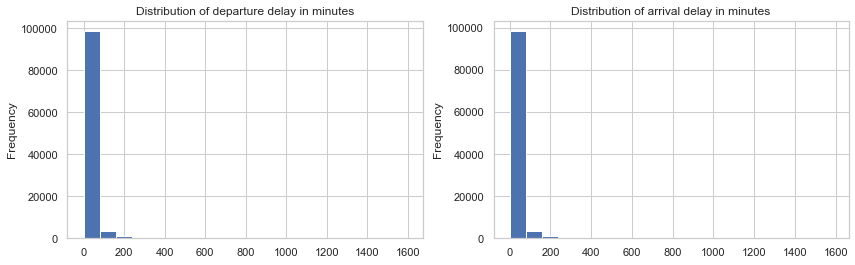

In [15]:
#histograms of the departure and arrival delay times
fig, ax = plt.subplots(figsize = (14, 4), ncols = 2)

ax1= df_train['Departure Delay in Minutes'].plot(kind='hist', bins=20, ax=ax[0])
ax2=df_train['Arrival Delay in Minutes'].plot(kind='hist', bins=20, ax=ax[1])
ax1.set_title('Distribution of departure delay in minutes')
ax2.set_title('Distribution of arrival delay in minutes')

print("Number of departures with delay time > 8 hours", (df_train['Departure Delay in Minutes'][df_train['Departure Delay in Minutes']>500].count()))
print("Number of arrivals with delay time > 8 hours", (df_train['Arrival Delay in Minutes'][df_train['Arrival Delay in Minutes']>500].count()))

***

The histograms of numerical features show that the passengers' age is distributed normally, while the other three variables do not exhibit a normal distribution. The airline includes a larger number of short-distance flights than the long distance. Regarding the delay time for arrival and departure, most delays are in the range between 0 and 500 minutes, while there have been only nine delays longer than 800 minutes. We can also present the last two variables using box plots. But first, we will drop the departure delay column as strongly correlated with the arrival delay column. 

In [16]:
#dropping correlated columns
df_train.drop(['Departure Delay in Minutes'], inplace=True, axis=1) 
df_test.drop(['Departure Delay in Minutes'], inplace=True, axis=1) 

#### Boxplots for numerical columns

The boxplots are well known for showing skewed variables through the positions of median, quartiles, maximum, and minimum values. If there are outliers in a dataset, they usually lay outside of the top and bottom whiskers, which represents the maximum and minimum values. 

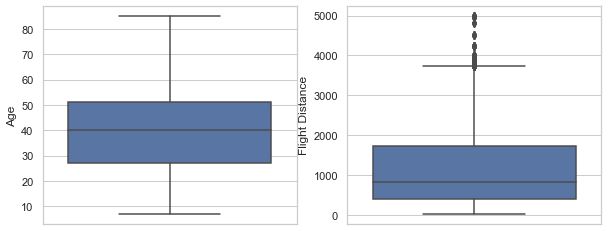

In [17]:
#boxplots for age and flight distance columns
num_columns=['Age', 'Flight Distance', 'Arrival Delay in Minutes']

fig, ax = plt.subplots(figsize = (10, 4), ncols = 2)
sns.boxplot(y='Age', data=df_train, ax=ax[0])
sns.boxplot(y='Flight Distance', data=df_train, ax=ax[1])

Percentage of flights with delays on arrival more than 5 minutes:34%


(-10, 200)

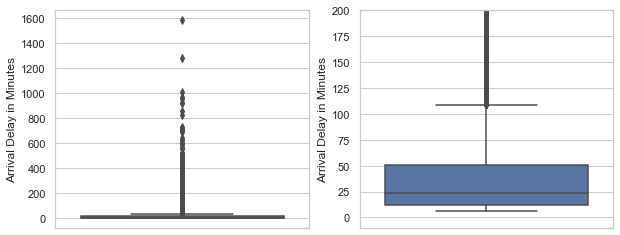

In [18]:
#boxplots for arrival delay column
fig, ax = plt.subplots(figsize = (10, 4), ncols = 2)

sx=sns.boxplot(y='Arrival Delay in Minutes', data=df_train, ax=ax[0])

#boxplot for arrival delay column excluding arrivals on time
df_late=df_train[(df_train['Arrival Delay in Minutes']>5)]
print("Percentage of flights with delays on arrival more than 5 minutes:" 
                   "{0:.0f}%".format(df_late.shape[0]/df_train.shape[0] * 100))

sx=sns.boxplot(y='Arrival Delay in Minutes', data=df_late, ax=ax[1])
sx.set_ylim(-10,200)

In [19]:
#statistics for arrival delay column
display(df_train['Arrival Delay in Minutes'].describe())

#statistics for arrival delay longer than 5 minutes
display(df_late['Arrival Delay in Minutes'].describe())

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

count    35643.000000
mean        43.327077
std         56.055904
min          6.000000
25%         12.000000
50%         24.000000
75%         51.000000
max       1584.000000
Name: Arrival Delay in Minutes, dtype: float64

***
From the above box plots, we can observe that the long-distance flight data points lay outside of the 1.5 interquartile range. The arrival delay feature is rightly-skewed, with 75% of values between 0 and 13 minutes. Therefore most flights arrive and also depart on time. By selecting only flights that are late for more than five minutes, we can notice that only 34% of flights were delayed and that from these flights, 75% of delays are between  6 and 51 minutes.

#### Encoding categorical variables

There are several ways how we can encode categorical variables in Python, eighter by using Panda's get_dummies method or by applying scikit-learn classes LabelEncoder and OneHotEncoder. We will use LabelEncoder for the target variable, as recommended by the scikit-learn documentation and Panda's get_dummies method for other columns. 

In [20]:
#applying LabelEncoder for the dataframe index column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train.index=le.fit_transform(df_train.index)

#applying get_dummies for other columns
df_train1 = pd.get_dummies(df_train[categorical_cols])
df_train.drop(categorical_cols, inplace=True, axis=1)

#creating a final test dataframe with all numerical values
df_train=pd.concat([df_train1, df_train], axis=1)

display(df_train.head(5))

#applying the same steps for the test table
df_test.index=le.fit_transform(df_test.index)

df_test1 = pd.get_dummies(df_test[categorical_cols])
df_test.drop(categorical_cols, inplace=True, axis=1)
df_test=pd.concat([df_test1, df_test], axis=1)

print("Train dataframe:", df_train.shape)
print("Test dataframe:", df_test.shape)

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,0,1,1,0,0,1,0,0,1,13,...,3,5,5,4,3,4,4,5,5,18.0
0,0,1,0,1,1,0,1,0,0,25,...,3,1,1,1,5,3,1,4,1,6.0
1,1,0,1,0,1,0,1,0,0,26,...,5,5,5,4,3,4,4,4,5,0.0
0,1,0,1,0,1,0,1,0,0,25,...,2,2,2,2,5,3,1,4,2,9.0
1,0,1,1,0,1,0,1,0,0,61,...,5,5,3,3,4,4,3,3,3,0.0


Train dataframe: (103594, 26)
Test dataframe: (25893, 26)


#### Preparing tables for Amazon SageMaker

To use Amazon SageMaker for ML modeling, we need to organize data into a specific format: with no headers and with the first column as a label column (<a href="https://docs.aws.amazon.com/sagemaker/latest/dg/kNN-in-formats.html">Data Formats for Knn training inputs</a>). The label column,  passenger satisfaction, has already been marked as a first-index column in df_train and df_test data frames, with the encoded values 1 for a satisfied customer and 0 for a neutral or dissatisfied customer. Dataframes are saved in two files for use by AWS in-built algorithms.

In [21]:
#writing data frames to files

def dataframe_to_file(df_name, filename):
   try:
      df_name.to_csv(filename, header=False, index=False)
   except IOError:
    print ("Cannot write to file. Close the file")
    
dataframe_to_file(df_train, 'train_encoded.csv')
dataframe_to_file(df_test, 'test_encoded.csv')

###  Applying the K-NN model using Scikit-learn library

To apply the K-NN model with default parameters (n_neighbors=5), we will first train the model on the training dataset and then use it to predict target variables for the test dataset. Using the <i>score</i> method, we can evaluate the model. 

In [22]:
#function for preparing X and y arrays for training by model
def prepare_train_test_data(df_in):
    df1=df_in
    y=df1.index.values
    X=df1.reset_index(drop=True).values
    print(X, y)
    return(X, y)   

print('Train dataset...')
X_train, y_train = prepare_train_test_data(df_train)
print('Test dataset...')
X_test, y_test = prepare_train_test_data(df_test)

Train dataset...
[[ 0.  1.  1. ...  5.  5. 18.]
 [ 0.  1.  0. ...  4.  1.  6.]
 [ 1.  0.  1. ...  4.  5.  0.]
 ...
 [ 0.  1.  0. ...  5.  4. 14.]
 [ 1.  0.  0. ...  4.  1.  0.]
 [ 0.  1.  1. ...  3.  1.  0.]] [0 0 1 ... 0 0 0]
Test dataset...
[[ 1.  0.  1. ...  5.  5. 44.]
 [ 1.  0.  1. ...  4.  5.  0.]
 [ 0.  1.  0. ...  2.  2.  0.]
 ...
 [ 1.  0.  1. ...  4.  2.  0.]
 [ 0.  1.  1. ...  5.  4.  0.]
 [ 1.  0.  1. ...  1.  1.  0.]] [1 1 0 ... 0 1 0]


In [23]:
#importing the knn classifier 
from sklearn.neighbors import KNeighborsClassifier

#instantiating the class
knn=KNeighborsClassifier()
#fitting the model
knn.fit(X_train,y_train)
#predicting the target variables
y_pred=knn.predict(X_test)
#calculating accuracy
acc=knn.score(X_test, y_test)

print('Predicted target values:', y_pred)
print(f'Model accuracy: {acc: .1%}')

Predicted target values: [0 1 0 ... 0 1 0]
Model accuracy:  76.5%


***
We can see that our model is about 76% accurate, meaning that the model predicted the passenger satisfaction level correctly for 76% of the samples in the test dataset. 

####  Evaluating the K-NN model using confusion matrix and cross-validation

A function named, the confusion matrix, is usually used to evaluate the performance of a binary classification. The confusion matrix summarises the number of correct and incorrect predictions. Values on the main diagonal of the confusion matrix correspond to the correct classifications, while the other numbers tell us about incorrect ones. To summarise the matrix, we can also find quantities such as precision and recall. While the precision provides the number of correct positive predictions made out of all positive predictions, recall gives information about the number of correct positive predictions out of all actual values. 

Another statistical method used to evaluate the performance of a model is the k-fold cross-validation technique. We can use cross-validation (CV method) when selecting the best model for a dataset or when estimating the error for the model. During this process, a train dataset is split repeatedly into k-folds, and the model is built for each fold. The average of the recorded errors is used as performance metrics for the model.

Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.82      0.80     14528
           1       0.75      0.69      0.72     11365

    accuracy                           0.76     25893
   macro avg       0.76      0.76      0.76     25893
weighted avg       0.76      0.76      0.76     25893



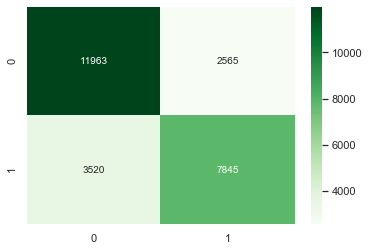

In [24]:
#finding confusion-matrix, precision and recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

def find_confusion_matrix(target_test, target_pred):
    matrix = classification_report(target_test,target_pred,labels=[0,1])
    print('Classification report: \n',matrix)
    cf_matrix = confusion_matrix(target_test, target_pred)
    sns.heatmap(cf_matrix, annot=True, fmt="g",cmap="Greens")
      
find_confusion_matrix(y_test,y_pred)

***
The confusion-matrix for the airline dataset shows that the K-NN model gives around three times more correct predictions (numbers on the main diagonal) than incorrect ones. 

In [25]:
#calculating the cross-validation scorewith 3 folds
from sklearn.model_selection import cross_val_score

def find_cross_val(model, feature_train, target_train, n_folds):
    cv_score=cross_val_score(model, feature_train, target_train, cv=n_folds)
    print(f'Cross-validation score: {cv_score.mean(): .1%}')
        
find_cross_val(knn, X_train, y_train, 3)    

Cross-validation score:  75.8%


#### K-NN model with scaled data

One of the problems of the airline data set is in a broad range of values for columns such as flight distance and arrival delay time,  and in the right-skewed data for some columns. For example, having some features with the variance much larger than for the other columns can impact the model performance. Scikit-learn provides a couple of different ways to normalize and scale data, which should improve the performance of the K-NN model. We will use a standard scaling method from scikit-learn, StandardScaler, which removes the mean value from data and scales them to unit variance.

In [26]:
#applying standard scaler to datasets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
X_train_s=np.around(X_train_s, decimals=2)
X_test_s=np.around(X_test_s, decimals=2)

#applying the K-NN model on the scaled dataset
knn.fit(X_train_s, y_train)
y_pred_s=knn.predict(X_test_s)
acc_s=knn.score(X_test_s, y_test)

print('Predicted target values:', y_pred)
print(f'Model accuracy: {acc_s: .1%}', '\n')

Predicted target values: [0 1 0 ... 0 1 0]
Model accuracy:  92.7% 



In [27]:
#estimating the model performance
find_cross_val(knn, X_train_s, y_train, 3)    

Cross-validation score:  92.5%


***
Using the scaled datasets, the K-NN model shows improved accuracy and performance. 

### Applying XGBoost model

In [28]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
acc_xg= xg.score(X_test, y_test)

print('Predicted target values:', y_pred)
print(f'Model accuracy: {acc_xg: .1%}')

Predicted target values: [1 1 0 ... 0 1 0]
Model accuracy:  94.1%


***
After training the XGBoost model,  results show the same accuracy of 94% for both predictions with the starting data and the normalized set. Being a type of decision tree algorithm, XGBoost does not require normal distributions of features. The XGBoost algorithm can be improved by tuning hyperparameters and dropping selected, less important features from the dataset. 

#### Evaluating XGBoost model using confusion matrix and cross-validation

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14528
           1       0.95      0.92      0.93     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893

Cross-validation score:  94.0%


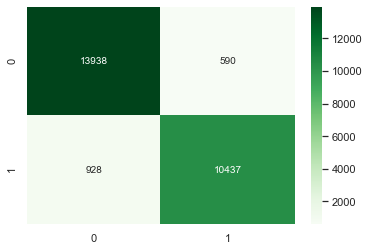

In [29]:
#calculating confusion matr
find_confusion_matrix(y_test,y_pred)

#calculating cross_validation score
find_cross_val(xg, X_train, y_train, 3)

###  Using Amazon SageMaker built-in algorithms

The same airline survey data set was modeled using the Amazon SageMaker built-in algorithms for K-NN and XGBoost models. SageMaker is a machine learning cloud service on AWS, that provides resources for building, training, and deploying machine learning models. In this way, a continuous cycle with fully managed resources provided by Amazon SageMaker can be organized for data modeling. 

One way of working with SageMaker is setting parameters for the models directly through the AWS website and then using an API gateway to run the model with the new testing datasets. The second way is using a notebook instance to interact with SageMaker's services responsible for running machine learning models.

For this part of the project, we will only make a brief overview of parameters and results obtained after using Amazon SageMaker's built-in algorithms, K-NN and XGBoost, through the AWS website. 

#### Parameters and model accuracy for the K-NN and XGBoost models

The built-in K-NN classification model for the Amazon SageMaker is an index-based algorithm with three main steps focused on data sampling, dimension reduction, and index building. There is an emphasis on dimensionality reduction to reduce the use of computer memory.

The model was trained on the encoded dataset with the same parameter k=5 - the number of nearest neighbors, as the one used for the scikit-algorithm. With the other parameters set to the default values, the model achieved an accuracy of 62%. This number improved to 88% after using the scaled train and test datasets. 

For the airline dataset,  I used the following set of parameters to train the built-in K-NN model:  

In [30]:
#Set of hyperparameters used for training K-NN model

hyperparameters = {
        "feature_dim":"26",
        "mini_batch_size": "500",
        "k": "5",
        "predictor_type":"classifier",
        "sample_size":"2000",
        "index_type":"faiss.Flat",
        "index_metric": "2",
        "eval_metric": "L2",
        "faiss_index_ivf_nlists": "auto"
        }

The Amazon SageMaker XGBoost as a built-in algorithm is a fast and efficient way of training an ML model using a directly prepared training dataset and then evaluating the model on the test dataset. The XGBoost has a long list of hyperparameters that we can tune for the best accuracy. 

In the first attempt, I used all the default hyperparameters, except <i>num_round</i>, <i>objective</i>, <i>num_class</i> and <i>eval_metric</i>. The number of rounds for training jobs was fixed to 10. This hyperparameter increases the number of decision trees used and increases training time and accuracy as its value increases. <i>Max_depth</i> parameter for a tree was kept at 6 so that the model does not show overfitting. Another important parameter is <i>objective</i>, set to  "multi:softmax" and also <i>eval_metric</i> set to merror, which is defined as the number of wrongly predicted cases over the number of all cases. 

As a result, our XGBoost trained model achieved merror of 5%, meaning that only 5% of data were incorrectly classified, and 95% of the input test data were correctly classified. 

In [31]:
#Set of hyperparameters used for training XGBoost model

hyperparameters = {
        "num_round":"10",
        "booster": "gbtree",
        "tree_method": "auto",
        "max_depth":"6",
        "eta":"0.3",
        "objective":"multi:softmax",
        "num_class": "2",
        "eval_metric": "merror"
        }

### Summary

In this notebook, we examined <a href="https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction"> Kaggle </a> airline survey dataset, which was separated into 80% of train data and 20% of the test data. The training table has over 100 000 rows, while the test table includes around 26 000 rows. The tables contain 24 columns of different data types, including categorical and numerical data. This project aims to predict passenger satisfaction level, values located in the label column "passenger satisfaction", based on the values from the other 23 different features. This is a classification problem, and two machine learning models were applied using the scikit-learn library and the Amazon SageMaker ML services.

The data were examined and pre-processed, before modeling by applying various techniques including cleaning data, processing null and unnecessary columns, encoding categorical variables into numerical values, studying distributions of numerical columns, finding correlated features, scaling features, and organizing tables in the format required by the SageMaker.

Overall the K-NN model required more tuning and showed less accuracy after training (62% and 76% with the default parameters) and 92% after the data set was scaled using scikit-learn ClassicalScaler. On the other hand, the XGBoost model was faster to train for the airline dataset and the predictions were more accurate, 95%, and 94% for the Amazon SageMaker XGBoost built-in model and the standard XGBoost model, respectively. Also, the XGBoost did not require data scaling.

This is a preliminary analysis of the airline survey dataset. Both models need additional evaluation steps, such as dimensionality reduction, hyperparameter tuning, and selection of the features that have the most influence on the predictions. 